# TP1

In [1]:
from TD1 import load_data, MLP_MNIST, plot, plot_hist
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

Using TensorFlow backend.


## Loading MNIST data
The data is already splitted in train, valid and test set. The train, valid and test sets are shuffled. 
I define here also the constants for the training (epoch number, verbosity and batch size).

In [3]:
data = load_data()
epochs = 20
verb = 0
batch = 30
leg = ['relu','sigmoid','resNet']

... loading data
5.11363e+06
[4932 5678 4968 5101 4859 4506 4951 5175 4842 4988]


## MLP_MNIST function
this function trains a neural network. I used keras to encode it.
The default parameters of the model are :
```{python}
    hparams = {
        'activation': 'relu',
        'noeuds': [256,256,256],
        'learning_rate': 0.013,
        'reg_l1': 0,
        'reg_l2': 0.00001,
        'n_couches': 3,
        'residual':False
    }
```
The neural network is common MLP. The 'residual' argument makes it residual if activated. 
When resudual is True then layers congruent to 1 modulo 3 are conneted to the next layers congruent to 0 modulo 3

The objective fucntion (loss) is the categorical crossentropy, as we want to classify numbers. The last layer activation function is set to 'softmax' for the same reason.

A small L2 regularisation is used. It is not essential as it doesn't improve the accuracy of the model.

To transform data on the fly is used the keras function ImageDataGenerator with the following arguments:
```{python}
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')
```

These transformation seems reasonable and don't affect to much the numbers. (a rotation of 180° woukd tranform a 6 into a 9)

As suggested for the TP, nine experiments where taken, 3 with 3 hidden layers ([256,256,256]), 3 with 6 hidden layers ([256,256,256,128,128,128]) and 3 with 9 hidden layers ([256,256,256,128,128,128,64,64,64]). 
Three experiments were done with the relu activation function, three with the sigmoid and three with the sigmoid and a residual network.

## First experiment

In [3]:
with tf.device('/cpu:0'):
    dic ={
        'noeuds':[256,256,256]
    }
    dic['n_couches']=len(dic['noeuds'])
    model_relu, hist_relu = MLP_MNIST(data, nb_epoch=epochs, verb=verb, batch_size=batch,**dic)
    dic['activation']='sigmoid'
    model_sigmoid, hist_sigmoid = MLP_MNIST(data, nb_epoch=epochs, verb=verb, batch_size=batch, **dic)
    dic['residual']=True
    model_res, hist_res = MLP_MNIST(data, nb_epoch=epochs, verb=verb, batch_size=batch, **dic)
leg = ['relu','sigmoid','resNet']
models = [model_relu,model_sigmoid,model_res]
hists = [hist_relu,hist_sigmoid,hist_res]

C:\Users\phulo\PycharmProjects\INF6953H\TD1.py:132: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<map objec..., verbose=0, steps_per_epoch=1666, epochs=20, validation_data=(array([[ ..., callbacks=[<TD1.Loss...)`
  callbacks=[hist])


[0.14119531037807465, 0.97470000000000001]
[0.19847437458038331, 0.96679999999999999]
[0.19081419266462327, 0.97009999999999996]


We can see that the model with the relu activation function scores the best with a validation loss of 0.13 and an accuracy of 0.978. Then the sigmoid model scores with a loss of 0.18 and an accuracy of 0.971 and finally the resNet scores with a loss of 0.19 and an accurracy of 0.967 (still on the validation set)

I've displayed the loss and accuracy :
    <ul>
        <li>on the left the loss and accuracy on the training set (per epoch)
        <li>on the right the loss and accuracy on the validation set (per epoch)
    </ul>
    
The last plot represents the training loss per batch.

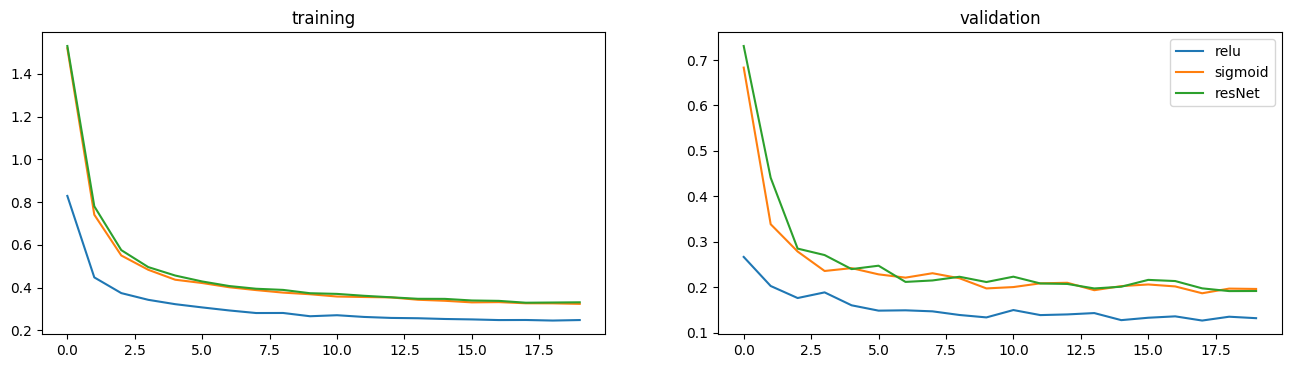

In [4]:
plot(models,'loss',leg)

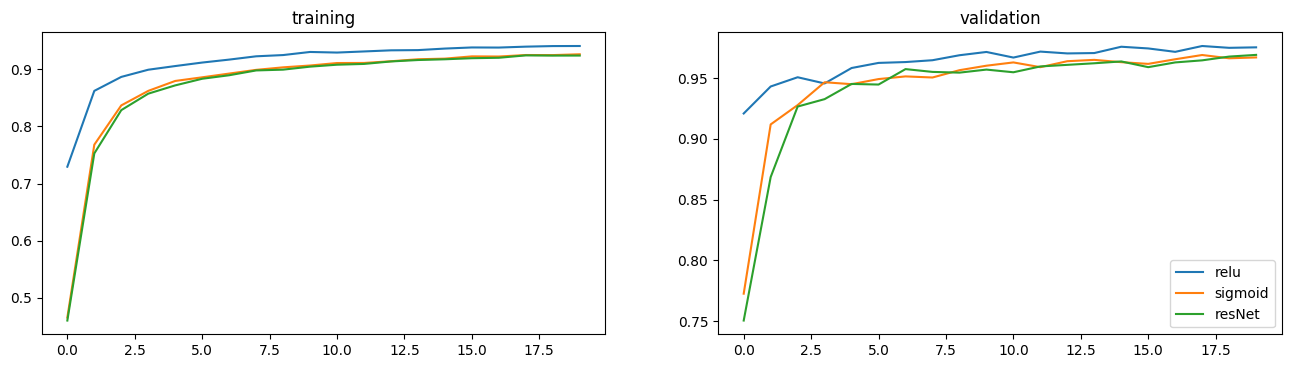

In [5]:
plot(models,'categorical_accuracy',leg)

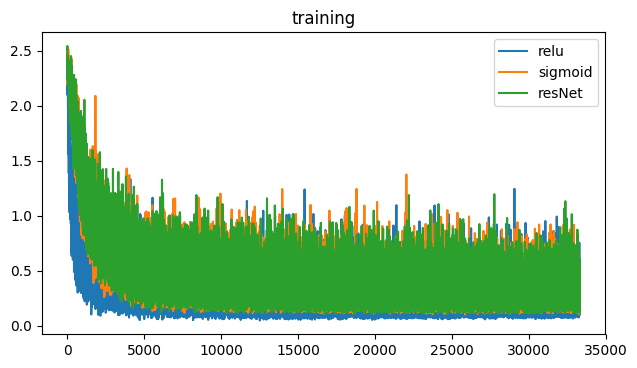

In [6]:
plot_hist(hists,leg)

We conclude that the relu scores the best, and that the softmax and resnet are comparable. The networks have all converged in the defined number of epochs and no over fitting is visible. Then we don't need in this expriment to use dropout, or early stopping. There is still a L2 regularisation in the network.

## Second experiment

In [7]:
with tf.device('/cpu:0'):
    dic ={
        'noeuds':[256,256,256,128,128,128]
    }
    dic['n_couches']=len(dic['noeuds'])
    model_relu, hist_relu = MLP_MNIST(data, nb_epoch=epochs, verb=verb, batch_size=batch,**dic)
    dic['activation']='sigmoid'
    model_sigmoid, hist_sigmoid = MLP_MNIST(data, nb_epoch=epochs, verb=verb, batch_size=batch, **dic)
    dic['residual']=True
    model_res, hist_res = MLP_MNIST(data, nb_epoch=epochs, verb=verb, batch_size=batch, **dic)
models = [model_relu,model_sigmoid,model_res]
hists = [hist_relu,hist_sigmoid,hist_res]

C:\Users\phulo\PycharmProjects\INF6953H\TD1.py:132: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<map objec..., verbose=0, steps_per_epoch=1666, epochs=20, validation_data=(array([[ ..., callbacks=[<TD1.Loss...)`
  callbacks=[hist])


[0.14275198404788972, 0.9758]
[0.24455815151929855, 0.95289999999999997]
[0.20558057134151458, 0.9657]


We can see that the model with the relu activation function scores the best with a validation loss of 0.14 and an accuracy of 0.975. Then the sigmoid model scores with a loss of 0.24 and an accuracy of 0.95 and finally the resNet scores with a loss of 0.20 and an accurracy of 0.966 (still on the validation set)

I've displayed the loss and accuracy :
    <ul>
        <li>on the left the loss and accuracy on the training set (per epoch)
        <li>on the right the loss and accuracy on the validation set (per epoch)
    </ul>
    
The last plot represents the training loss per batch.

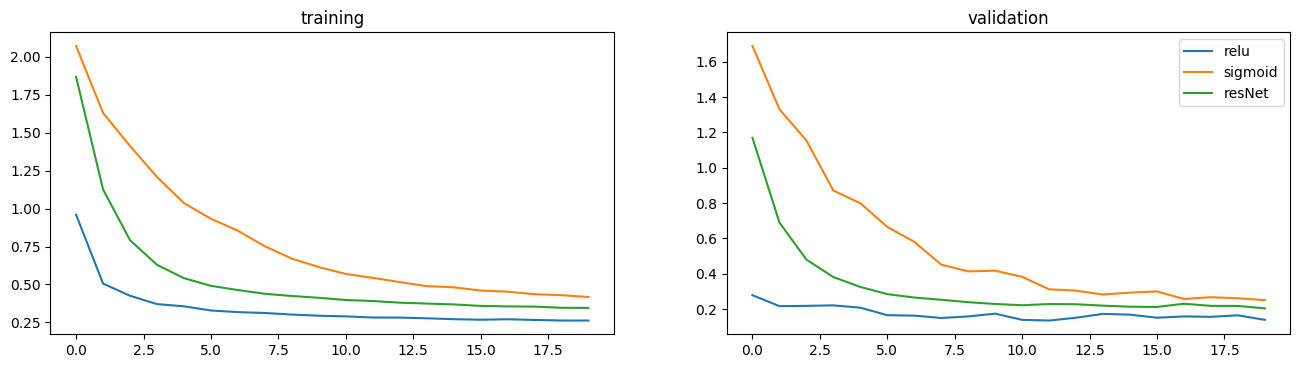

In [8]:
plot(models,'loss',leg)

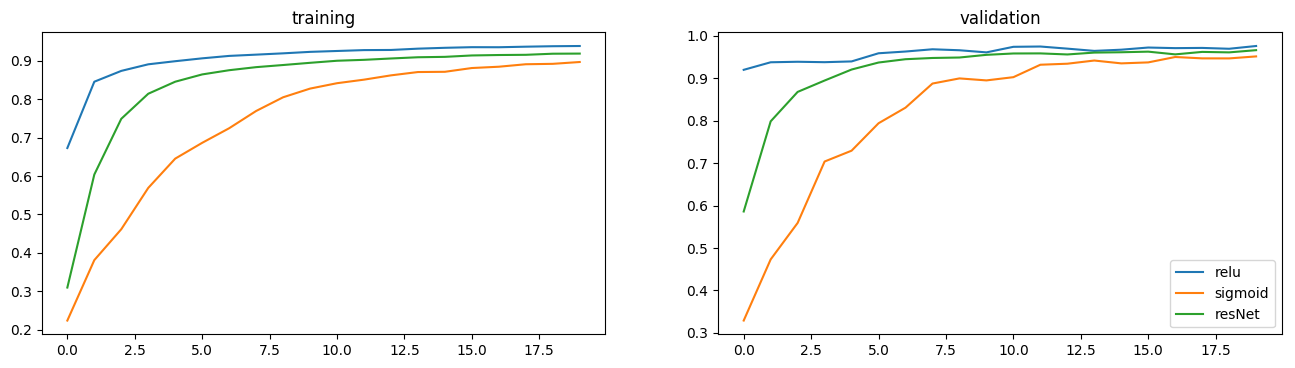

In [9]:
plot(models,'categorical_accuracy',leg)

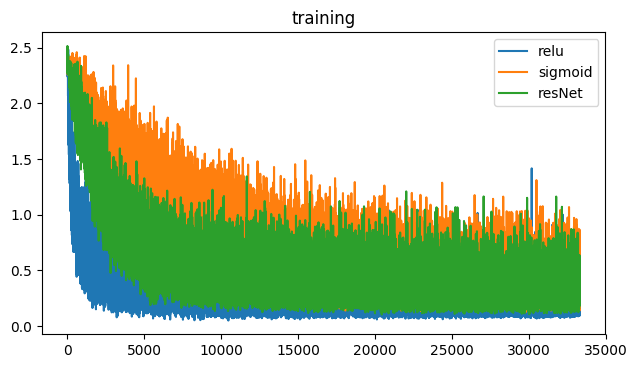

In [10]:
plot_hist(hists,leg)

We conclude that the relu scores the best. We begin to see here the advantage of using a the residual network on the sigmoid activation function. The sigmoid network learn slower than the ResNet, the gradient disappear partially is the backpropagation and weigths are slowly modified. The resNet network, still using an sigmoid activation function, is able to back propagate the gradient to the first layers and to quikly learn how to classify the numbers. There is no visible overfitting and then no need to use dropout or earlystopping.

Augmenting the size of the network doesn't improve the accuracy (-0.3% for the relu, -1.3% for the sigmoid, -0.4% for the resNet) even if the difference is not significant.


## Third experiment

In [4]:
with tf.device('/cpu:0'):
    dic ={
        'noeuds':[256,256,256,128,128,128,64,64,64]
    }
    dic['n_couches']=len(dic['noeuds'])
    model_relu, hist_relu = MLP_MNIST(data, nb_epoch=epochs, verb=verb, batch_size=batch,**dic)
    dic['activation']='sigmoid'
    model_sigmoid, hist_sigmoid = MLP_MNIST(data, nb_epoch=epochs, verb=verb, batch_size=batch, **dic)
    dic['residual']=True
    model_res, hist_res = MLP_MNIST(data, nb_epoch=epochs, verb=verb, batch_size=batch, **dic)
models = [model_relu,model_sigmoid,model_res]
hists = [hist_relu,hist_sigmoid,hist_res]

C:\Users\phulo\PycharmProjects\INF6953H\TD1.py:132: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<map objec..., validation_data=(array([[ ..., verbose=0, epochs=20, steps_per_epoch=1666, callbacks=[<TD1.Loss...)`
  callbacks=[hist])


[0.15128407222032547, 0.97209999999999996]
[2.3025388042449952, 0.10639999999999999]
[2.3023383144378662, 0.10639999999999999]


We can see that the model with the relu activation function scores the best with a validation loss of 0.15 and an accuracy of 0.972. Then the sigmoid model scores with a loss of 2.3 and an accuracy of 0.10 and finally the resNet scores with a loss of 0.23 and an accurracy of 0.96 (still on the validation set)

I've displayed the loss and accuracy :
    <ul>
        <li>on the left the loss and accuracy on the training set (per epoch)
        <li>on the right the loss and accuracy on the validation set (per epoch)
    </ul>
    
The last plot represents the training loss per batch.

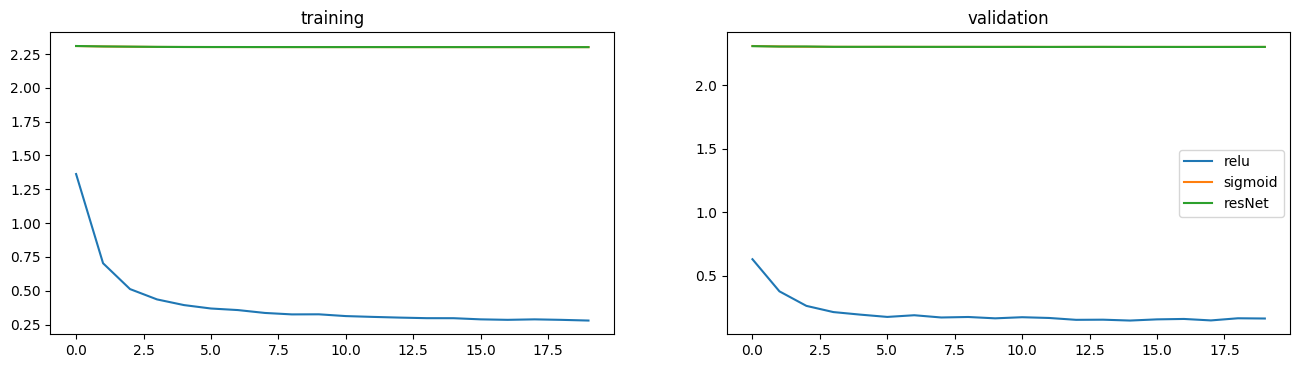

In [5]:
plot(models,'loss',leg)

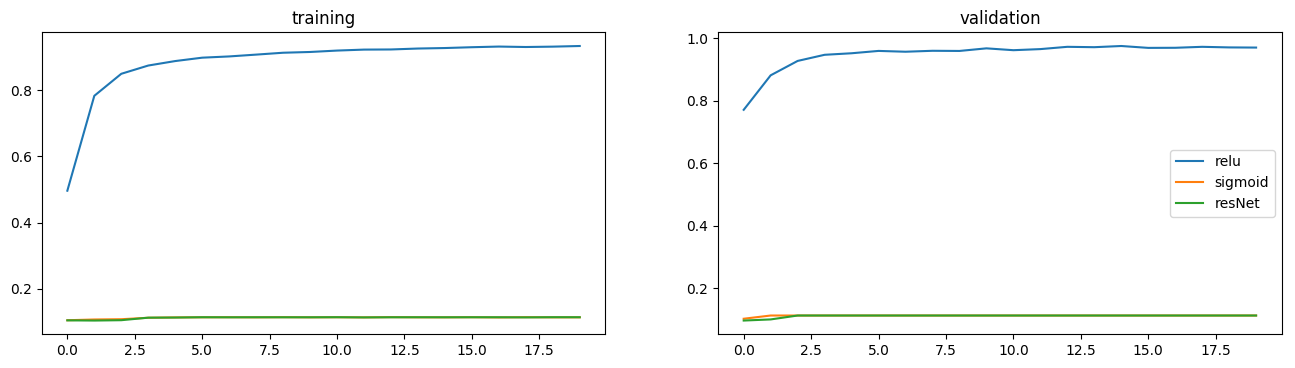

In [6]:
plot(models,'categorical_accuracy',leg)

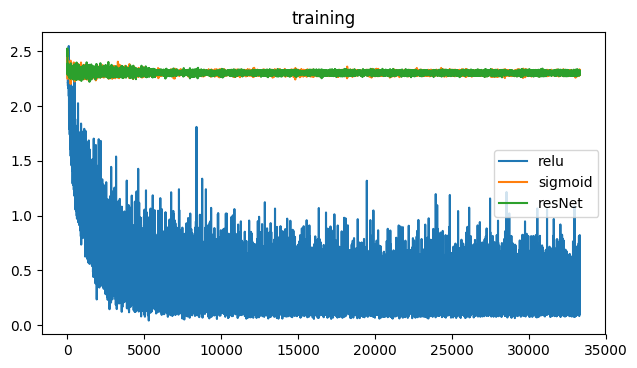

In [7]:
plot_hist(hists,leg)

As in the previous test the sigmoid model is 0unable to learn anything. The accuracy of the relu and resnet model decrease also a little bit (-0.5% for the relu and -0.7% for the resNet). the learn curve of the resNet has not the usual shape : the learning is linear for the 5 first epochs, until the best accuracy is reached (it slitly improve in the 15 next epochs).

## Conclusion
The best model to classify MNIST dataset remains the model using a Relu activation fucntion. The softmax activation fonction is unable to learn deep networks. The ResNet model succesfully manage to backpropagate the gradient to the first layers, even it becames harder in the last test. Using ResNet on a relu activation is meaning less as the relu activation manage to mantain a constant gradient norm in the backpropagation, then the help given by the resNet architecture is useless. 

In [12]:
with tf.device('/cpu:0'):
    dic['activation']='relu'
    model_res, hist_res = MLP_MNIST(data, nb_epoch=epochs, verb=verb, batch_size=batch, **dic)
models = [model_relu,model_sigmoid,model_res]
hists = [hist_relu,hist_sigmoid,hist_res]

C:\Users\phulo\PycharmProjects\INF6953H\TD1.py:132: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<map objec..., validation_data=(array([[ ..., verbose=0, epochs=20, steps_per_epoch=1666, callbacks=[<TD1.Loss...)`
  callbacks=[hist])


[0.15989030513763428, 0.97389999999999999]


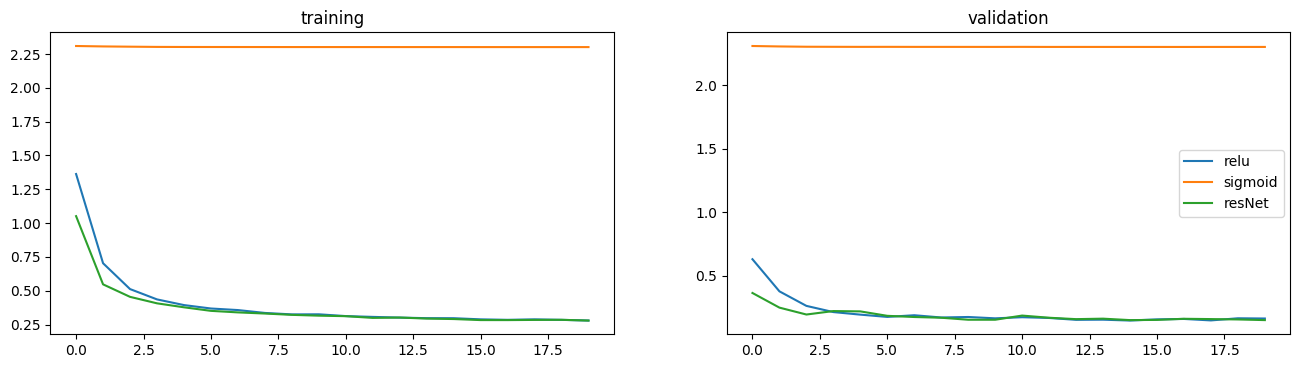

In [13]:
plot(models,'loss',leg)

l'utilisation de l'architecture resNet sur un réseau avec une activation relu permet quand même de faire converger plus rapidement le réseau sans modifier la performance du réseau.